# Finite State Machines

# 1. Designed FSMs

In [111]:
%%writefile fsm1.dot
digraph {
    label="Obstacle avoidance robot"; labelloc="top"; fontcolor="blue"; fontsize="15"; fontname="sans-serif";
    forward[label="Move forward"]; left[label="Turn left"];
    forward->forward[label="No obstacle"];
    forward->left[label="Obstacle detected\n"];
    left->forward[label="No obstacle detected\n"];
    left->left[label="Obstacle detected"];
}

Overwriting fsm1.dot


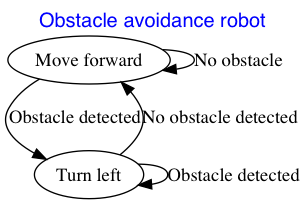

In [112]:
import os
from IPython.display import Image

os.system("dot fsm1.dot -Tpng -o fsm1.png")
Image("fsm1.png")

In [113]:
%%writefile fsm2.dot
digraph {
    label="Animal foraging and avoiding danger"; labelloc="top"; fontcolor="blue"; fontsize="15"; fontname="sans-serif";
    forage[label="Search for food"]; wander[label="Wander"]; run[label="Run away"];
    wander->forage[label="Hungry"];
    forage->wander[label="Found food"];
    wander->run[label="Threatened"];
    forage->run[label="Threatened"];
    run->wander[label="Escaped"];
}

Overwriting fsm2.dot


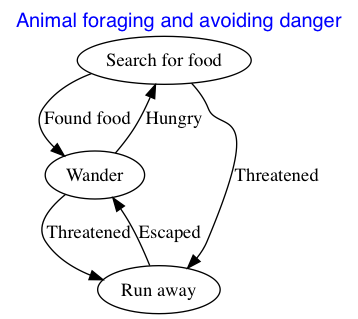

In [114]:
os.system("dot fsm2.dot -Tpng -o fsm2.png")
Image("fsm2.png")

In [115]:
%%writefile fsm3.dot
digraph {
    label="Predator"; labelloc="top"; fontcolor="blue"; fontsize="15"; fontname="sans-serif";
    wander; chase; flee; eat; death;
    wander -> chase [label="See smaller animal"];
    wander -> flee [label="See bigger animal"];
    flee -> wander [label="Successful escape"];
    chase -> eat [label="Catch"];
    eat -> wander;
    flee -> death [label="Caught"];
    chase -> wander [label="Prey escapes"];
    chase -> flee [label="Another animal appears"];
}

Overwriting fsm3.dot


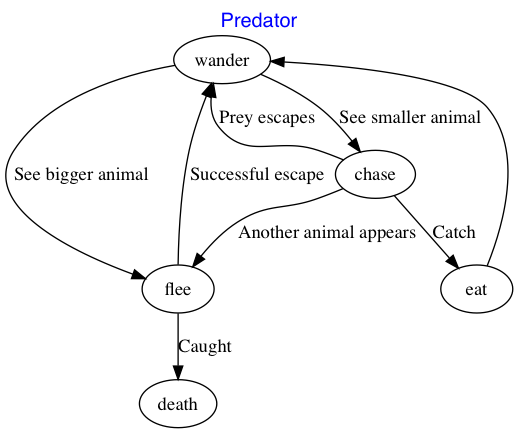

In [116]:
os.system("dot fsm3.dot -Tpng -o fsm3.png")
Image("fsm3.png")

# 2. Implemented FSM

In [117]:
behavior = {
    "wander": {
        "see bigger animal": "flee",
        "see smaller animal": "chase",
    },
    "chase": {
        "catch": "wander",
        "prey escapes": "wander",
        "another animal appears": "flee",
    },
    "flee": {
        "successful escape": "wander",
        "caught": "death",
    },
    "death": {},
}
current_state = "wander"

In [118]:
def get_response(inp):
    global current_state
    if inp not in behavior[current_state].keys():
        return f"Choose one of {list(behavior[current_state].keys())}"
    else:
        current_state = behavior[current_state][inp]
        if current_state is "death":
            return "You died."
        return f"Now performing '{current_state}.' What happens next?"


### Interface

In [119]:
from ipywidgets import widgets
from IPython.display import display, Markdown

text = widgets.Text()
display(text)

def submitted(sender):
    display(Markdown(f"**You:** {sender.value}"))
    response = get_response(sender.value)
    display(Markdown(f"**Response:** {response}"))
    sender.value = ""
text.on_submit(submitted)

display(Markdown(f"Now performing '{current_state}.' What happens next?"))

Now performing 'wander.' What happens next?

## Reflection on implementation
I'm satisfied with my implementation of this FSM and that I managed to find a clean and non-repetitive way to implement the FSM. Were I to continue in its development, I'd add more states and transtiions to improve the accuracy and sophistication of the model.

## Reflection on "Intelligence without Representation"

"Intelligence without Representation" describes a novel new approach to AI. Brooks suggests a method that contrasts with the practice of processing input centrally that was dominant at the time. As an alternative to a central source of truth lying between all input and all output, Brooks suggests multiple independent and parallel "layers" which would each process the inputs and produce an output. This would eliminate a single point of failure and allow for more flexibility. In addition, this could mean that some simpler reactions could occur faster than others rather than each behavior being inhibited by the performance of the processing required for the other behaviors. I think this approach makes a lot of sense and that Brooks presents a well-reasoned and convincing argument for this method.